['AR PL KaitiM Big5', 'AR PL KaitiM GB', 'AR PL Mingti2L Big5', 'AR PL SungtiL GB', 'AR PL UKai CN', 'AR PL UMing CN', 'Abyssinica SIL', 'Accanthis ADF Std', 'Accanthis ADF Std', 'Accanthis ADF Std', 'Accanthis ADF Std', 'Accanthis ADF Std No2', 'Accanthis ADF Std No2', 'Accanthis ADF Std No2', 'Accanthis ADF Std No2', 'Accanthis ADF Std No3', 'Accanthis ADF Std No3', 'Accanthis ADF Std No3', 'Accanthis ADF Std No3', 'Amiri', 'Amiri', 'Amiri', 'Amiri', 'Amiri Quran', 'Amiri Quran Colored', 'Andale Mono', 'Andale Mono', 'Ani', 'AnjaliOldLipi', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial Black', 'Arial Black', 'Arimo', 'Arimo', 'Arimo', 'Arimo', 'Asana Math', 'Baekmuk Batang', 'Baekmuk Dotum', 'Baekmuk Gulim', 'Baekmuk Headline', 'Berenis ADF Pro', 'Berenis ADF Pro', 'Berenis ADF Pro', 'Berenis ADF Pro', 'Berenis ADF Pro Math', 'Bitstream Vera Sans', 'Bitstream Vera Sans', 'Bitstream Vera Sans', 'Bitstream Vera Sans', 'Bitstream Vera Sans Mono', 'Bitstr

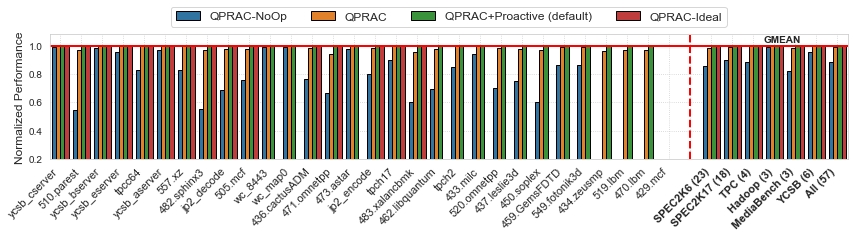

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings

methods_interested = ["QPRAC-NoOp", "QPRAC", "QPRAC+Proactive", "QPRAC-Ideal"]  # Further remove PQ-NoOp if unnecessary
# Read the CSV file
csv_path = '../results/csvs/QPRAC_32NBO_5PSQ_results.csv'
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"The file {csv_path} does not exist.")
df = pd.read_csv(csv_path)

# Transform the DataFrame for plotting
df_melted = pd.melt(df, id_vars=['workload'], value_vars=methods_interested, var_name='PRAC_Implementation', value_name='WS')

rename_mapping = {
    'QPRAC+Proactive': 'QPRAC+Proactive (default)',
}
df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace(rename_mapping)

# Filter the data for high MPKI workloads
workloads_high_mpki = [
    'ycsb_cserver', '510.parest', 'ycsb_bserver', 'ycsb_eserver', 'tpcc64', 'ycsb_aserver',
    '557.xz', '482.sphinx3', 'jp2_decode', '505.mcf', 'wc_8443', 'wc_map0', '436.cactusADM',
    '471.omnetpp', '473.astar', 'jp2_encode', 'tpch17', '483.xalancbmk', '462.libquantum',
    'tpch2', '433.milc', '520.omnetpp', '437.leslie3d', '450.soplex', '459.GemsFDTD',
    '549.fotonik3d', '434.zeusmp', '519.lbm', '470.lbm', '429.mcf', '',
    'SPEC2K6 (23)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'MediaBench (3)', 
    'YCSB (6)', 'All (57)'
]
df_high_mpki = df_melted[df_melted['workload'].isin(workloads_high_mpki)]

methods_interested = ["QPRAC-NoOp", "QPRAC", "QPRAC+Proactive (default)", "QPRAC-Ideal"]
df_filtered = df_high_mpki[df_high_mpki['PRAC_Implementation'].isin(methods_interested)]
df_filtered['PRAC_Implementation'] = pd.Categorical(df_filtered['PRAC_Implementation'], categories=methods_interested, ordered=True)

# Set up the plotting environment
sns.set_palette('tab10')
sns.set_style("whitegrid")

plt.rcParams['font.family'] = 'Times New Roman'

# Create the plot
fig, ax = plt.subplots(figsize=(12, 3.7))
plt.rc('font', size=10)
xtick_order = workloads_high_mpki

ax = sns.barplot(x='workload', y='WS', hue='PRAC_Implementation', data=df_filtered, order=xtick_order, edgecolor='black')
ax.set_xticks(np.arange(len(xtick_order)))
ax.set_xticklabels(xtick_order, ha='right', rotation=45, fontsize=11)

# Highlight geomean labels in bold
geomean_labels = ['SPEC2K6 (23)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'MediaBench (3)', 'YCSB (6)', 'All (57)']
tick_labels = ax.get_xticklabels()
for tick_label in tick_labels:
    if tick_label.get_text() in geomean_labels:
        tick_label.set_fontweight('bold')

# Add reference lines and labels
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
ax.axvline(30, 0, 1, color='red', linestyle='--', linewidth=2)
ax.text(33.5, 1.02, 'GMEAN', fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('Normalized Performance', fontsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.27), ncol=5, fancybox=True, shadow=False, fontsize=12)
ax.set_ylim(0.2, 1.08)

# Final touches and save the plot
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()
# output_fig = './figures/Performance_Results_32BO_1RFM_4Queue.pdf'
# fig.savefig(output_fig, dpi=600, bbox_inches='tight')
# print(f"Figure saved to {output_fig}")


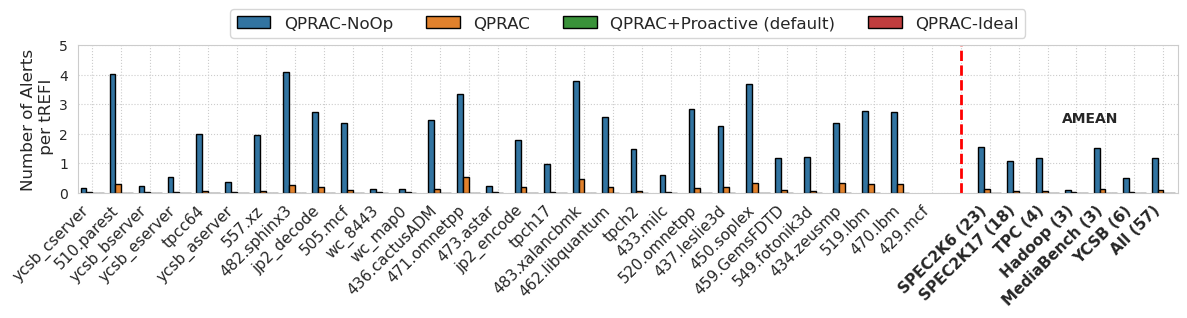

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings

methods_interested = ["QPRAC-NoOp", "QPRAC", "QPRAC+Proactive", "QPRAC-Ideal"]  # Further remove PQ-NoOp if unnecessary
# Read the CSV file
csv_path = '../results/csvs/QPRAC_ABO_results.csv'
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"The file {csv_path} does not exist.")
df = pd.read_csv(csv_path)

# Transform the DataFrame for plotting
df_melted = pd.melt(df, id_vars=['workload'], value_vars=methods_interested, var_name='PRAC_Implementation', value_name='num_alert_tREFI')

rename_mapping = {
    'QPRAC+Proactive': 'QPRAC+Proactive (default)',
}
df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace(rename_mapping)

# Filter the data for high MPKI workloads
workloads_high_mpki = [
    'ycsb_cserver', '510.parest', 'ycsb_bserver', 'ycsb_eserver', 'tpcc64', 'ycsb_aserver',
    '557.xz', '482.sphinx3', 'jp2_decode', '505.mcf', 'wc_8443', 'wc_map0', '436.cactusADM',
    '471.omnetpp', '473.astar', 'jp2_encode', 'tpch17', '483.xalancbmk', '462.libquantum',
    'tpch2', '433.milc', '520.omnetpp', '437.leslie3d', '450.soplex', '459.GemsFDTD',
    '549.fotonik3d', '434.zeusmp', '519.lbm', '470.lbm', '429.mcf', '',
    'SPEC2K6 (23)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'MediaBench (3)', 
    'YCSB (6)', 'All (57)'
]
df_high_mpki = df_melted[df_melted['workload'].isin(workloads_high_mpki)]

methods_interested = ["QPRAC-NoOp", "QPRAC", "QPRAC+Proactive (default)", "QPRAC-Ideal"]
df_filtered = df_high_mpki[df_high_mpki['PRAC_Implementation'].isin(methods_interested)]
df_filtered['PRAC_Implementation'] = pd.Categorical(df_filtered['PRAC_Implementation'], categories=methods_interested, ordered=True)

# Set up the plotting environment
sns.set_palette('tab10')
sns.set_style("whitegrid")

plt.rcParams['font.family'] = 'Times New Roman'

# Create the plot
fig, ax = plt.subplots(figsize=(12, 3.7))
plt.rc('font', size=10)
xtick_order = workloads_high_mpki

ax = sns.barplot(x='workload', y='num_alert_tREFI',hue='PRAC_Implementation', data=df_filtered, order=xtick_order, edgecolor='black')
ax.set_xticks(np.arange(len(xtick_order)))
ax.set_xticklabels(xtick_order, ha='right', rotation=45, fontsize=11)

# Highlight geomean labels in bold
geomean_labels = ['SPEC2K6 (23)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'MediaBench (3)', 'YCSB (6)', 'All (57)']
tick_labels = ax.get_xticklabels()
for tick_label in tick_labels:
    if tick_label.get_text() in geomean_labels:
        tick_label.set_fontweight('bold')

# Add reference lines and labels
ax.axvline(30, 0, 1, color='red', linestyle = '--', linewidth=2)
ax.text(33.5, 2.0, 'AMEAN', fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('Number of Alerts\n per tREFI', fontsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=5, fancybox=True, shadow=False, fontsize=12)
ax.set_ylim(0, 5.0)

# Final touches and save the plot
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

# Ensure the results/csvs directory exists
plots_dir = '../results/plots'
os.makedirs(plots_dir, exist_ok=True)

# output_fig = './figures/Performance_Results_32BO_1RFM_4Queue.pdf'
# fig.savefig(os.path.join(plots_dir, 'Figure_12.pdf'), dpi=600, bbox_inches='tight')
# print(f"Figure 12 Generated")
